## Loading Data and libraries 

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set display options
pd.set_option('display.max_columns', None)

# Load the data
data = pd.read_csv("C:/Users/Kateryna.Tekmenzhi/OneDrive - Bellevue College/data.csv", sep=";")

## Exploring the raw data 

In [7]:
# Check basic information
print("Dataset shape:", data.shape)
print("\nData types:")
print(data.dtypes)

Dataset shape: (4424, 37)

Data types:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date          

4,424 student records with 37 variables each


In [9]:
# View first few rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2          

In [10]:
# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                

## Missing Values Check

In [11]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                             

Data contains no missing values 

### Target variable 

In [12]:
# Target variable distribution
print("\nTarget variable distribution:")
print(data['Target'].value_counts())
print(data['Target'].value_counts(normalize=True).round(3) * 100)


Target variable distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Target
Graduate    49.9
Dropout     32.1
Enrolled    17.9
Name: proportion, dtype: float64


4,424 students split into 
Graduate  (2,209 students  49.9%) 
Dropout   (1,421 students  32.1%)
Enrolled  (794 students    17.9%)


Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Percentage distribution:
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: count, dtype: float64


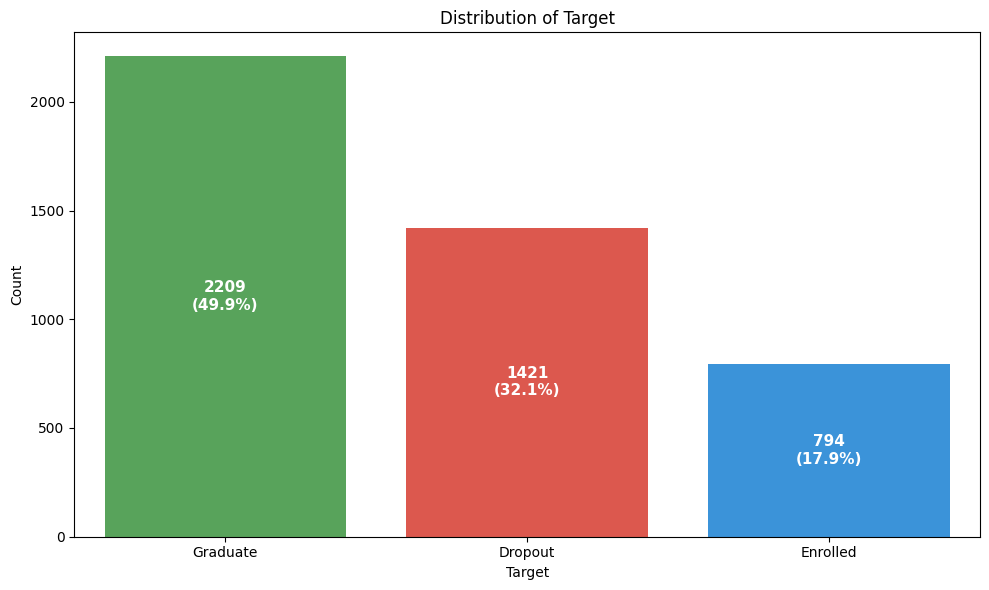

In [ ]:
variable = 'Target'  

# Print value counts
print(f"\n{variable}:")
counts = data[variable].value_counts()
print(counts)
percentages = 100 * counts / counts.sum()
print(f"\nPercentage distribution:")
print(percentages)

# Create plot
plt.figure(figsize=(10, 6))

# Custom colors for Target variable
if variable == 'Target':
    palette = {'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'}
    ax = sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=palette, legend=False)
else:
    ax = sns.barplot(x=counts.index, y=counts.values)

# Add labels (this approach avoids the indexing error)
for i, (idx, val) in enumerate(counts.items()):
    percentage = percentages[idx]
    ax.text(i, val/2, f'{val}\n({percentage:.1f}%)', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')

plt.title(f'Distribution of {variable}')
plt.ylabel('Count')
plt.xticks(rotation=45 if len(counts) > 5 else 0)
plt.tight_layout()
plt.show()

### Marital Status Variable


Marital status:
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


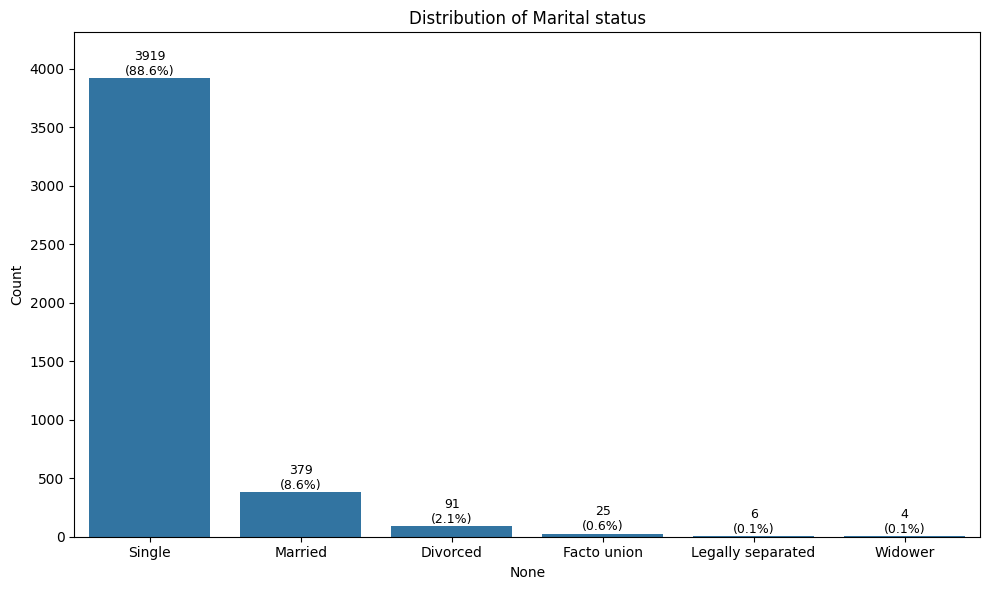

<Figure size 1200x600 with 0 Axes>

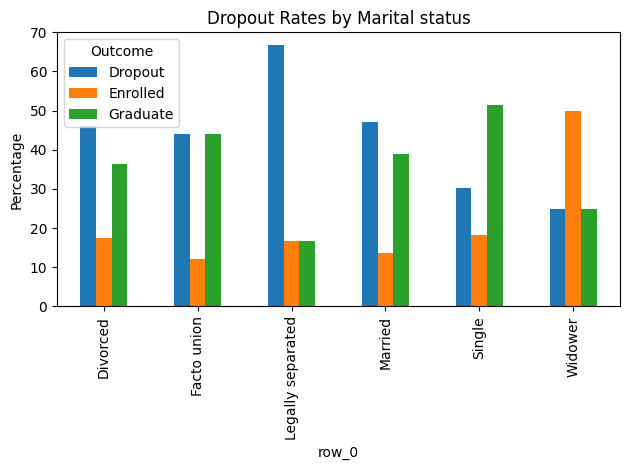

In [ ]:
# Analyze Marital Status
variable = 'Marital status'

# Create a mapping dictionary
marital_status_labels = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

# Get value counts
counts = data[variable].value_counts()
print(f"\n{variable}:")
print(counts)

# Create a Series with better labels for plotting
counts_labeled = pd.Series(
    counts.values, 
    index=[marital_status_labels.get(idx, str(idx)) for idx in counts.index]
)

# Create plot with labeled x-axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts_labeled.index, y=counts_labeled.values)

# Add percentage labels
total = len(data[variable])
for i, p in enumerate(ax.patches):
    percentage = 100 * p.get_height() / total
    ax.text(i, p.get_height() + 30, 
            f'{int(p.get_height())}\n({percentage:.1f}%)', 
            ha='center', fontsize=9)

plt.title(f'Distribution of {variable}')
plt.ylabel('Count')
plt.ylim(0, counts.max() * 1.1)
plt.tight_layout()
plt.show()

# Now show relationship with Target
plt.figure(figsize=(12, 6))
crosstab = pd.crosstab(
    index=[marital_status_labels.get(idx, str(idx)) for idx in data[variable]], 
    columns=data['Target'], 
    normalize='index'
) * 100
crosstab.plot(kind='bar')
plt.title(f'Dropout Rates by {variable}')
plt.ylabel('Percentage')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

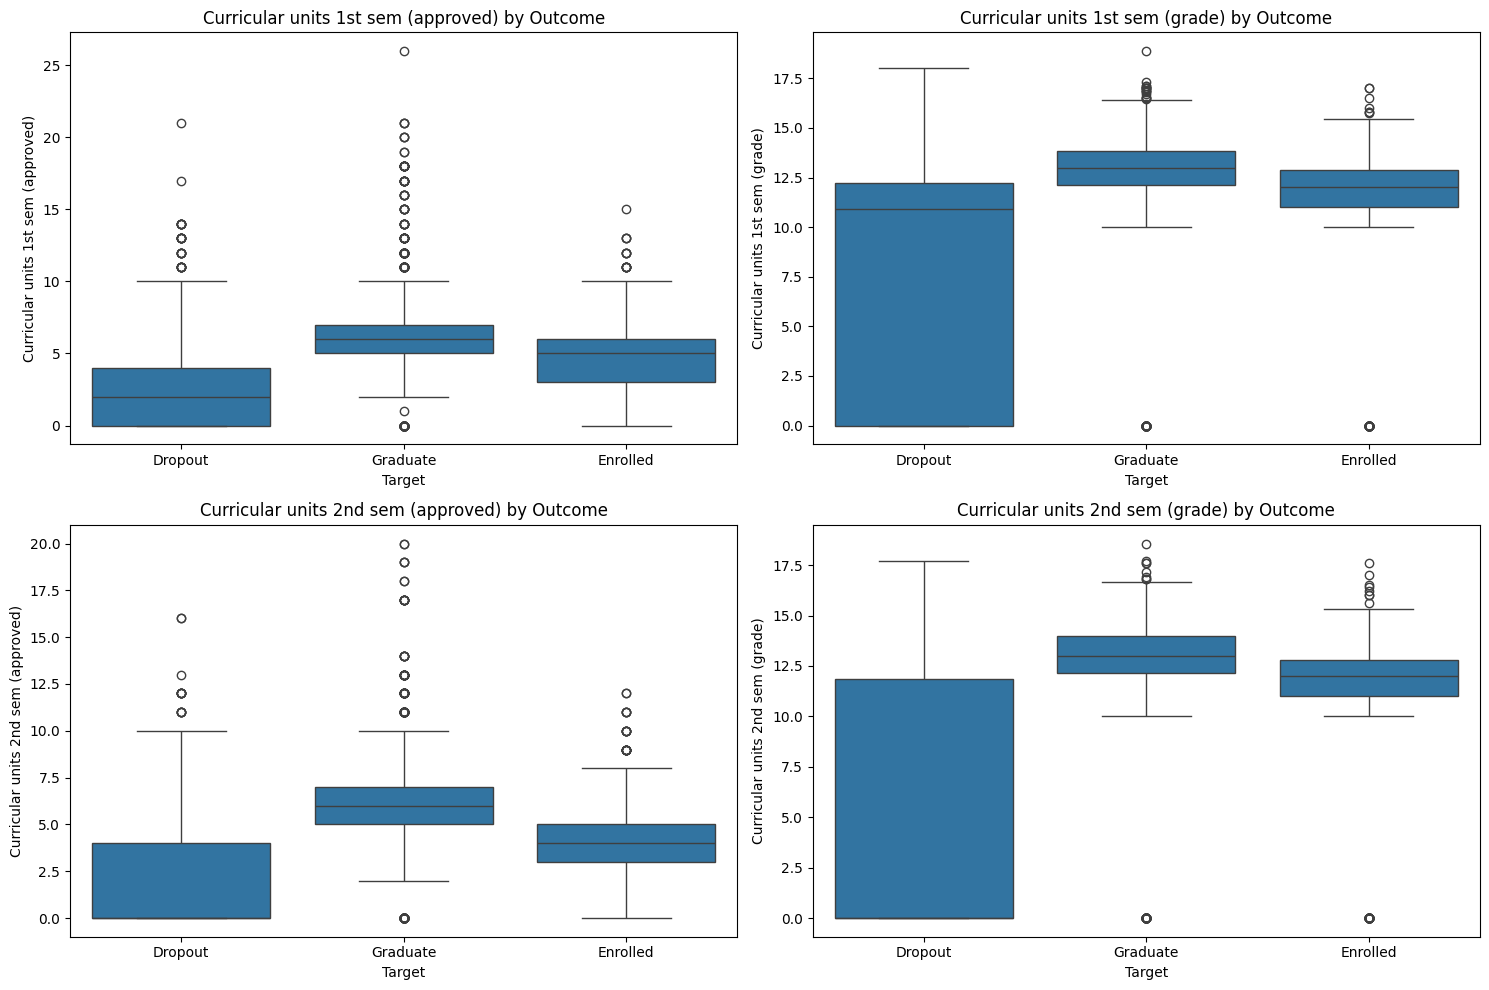

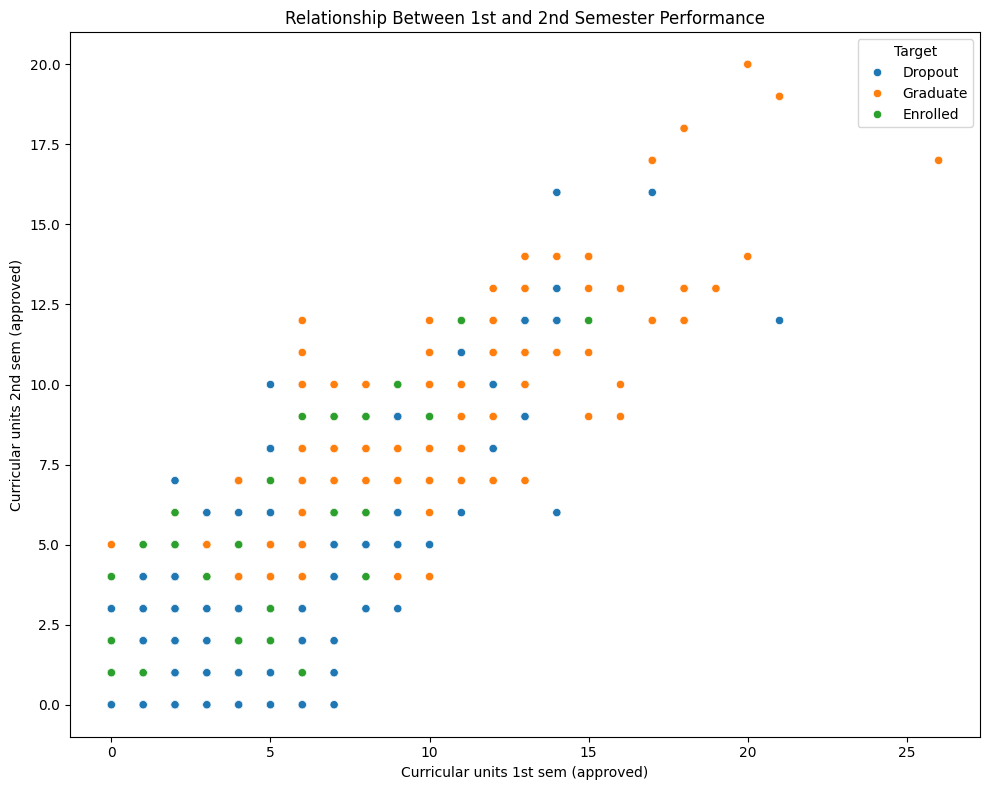

In [7]:
# Examine academic performance variables
academic_vars = ['Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
                'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

# Create boxplots to compare performance by target group
plt.figure(figsize=(15, 10))
for i, var in enumerate(academic_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Target', y=var, data=data)
    plt.title(f'{var} by Outcome')
plt.tight_layout()
plt.show()

# Correlation between 1st and 2nd semester performance
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Curricular units 1st sem (approved)', 
                y='Curricular units 2nd sem (approved)', 
                hue='Target', data=data)
plt.title('Relationship Between 1st and 2nd Semester Performance')
plt.tight_layout()
plt.show()

In [8]:
# Analyzing dropouts with zero grades in curricular units
# First, let's filter to only include dropout students
dropout_data = data[data['Target'] == 'Dropout']

# Check how many dropout students had zero grade in first semester
first_sem_zero_grade = dropout_data[dropout_data['Curricular units 1st sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 1st semester: {len(first_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(first_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in second semester
second_sem_zero_grade = dropout_data[dropout_data['Curricular units 2nd sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 2nd semester: {len(second_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(second_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in BOTH semesters
both_sem_zero_grade = dropout_data[(dropout_data['Curricular units 1st sem (grade)'] == 0.0) & 
                                  (dropout_data['Curricular units 2nd sem (grade)'] == 0.0)]
print(f"Dropouts with zero grade in BOTH semesters: {len(both_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(both_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Visualize these findings
categories = ['1st Sem Zero Grade', '2nd Sem Zero Grade', 'Both Sem Zero Grade']
values = [len(first_sem_zero_grade), len(second_sem_zero_grade), len(both_sem_zero_grade)]
percentages = [v/len(dropout_data)*100 for v in values]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color='tomato')
plt.ylabel('Percentage of Dropout Students')
plt.title('Percentage of Dropout Students with Zero G

SyntaxError: unterminated string literal (detected at line 29) (418543233.py, line 29)

Dropouts with zero grade in 1st semester: 570 out of 1421 dropouts
Percentage: 40.11%
Dropouts with zero grade in 2nd semester: 727 out of 1421 dropouts
Percentage: 51.16%
Dropouts with zero grade in BOTH semesters: 546 out of 1421 dropouts
Percentage: 38.42%


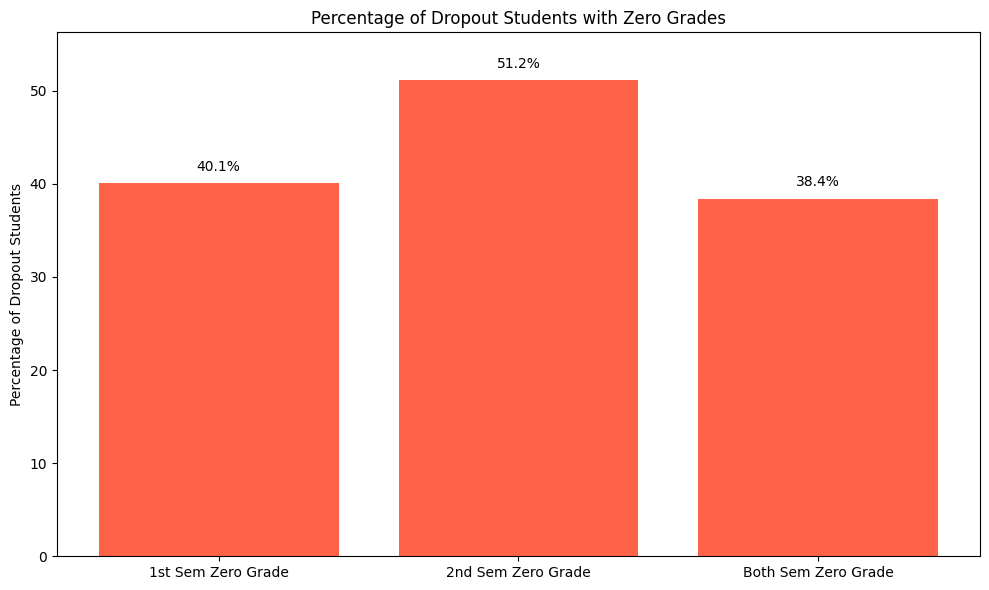

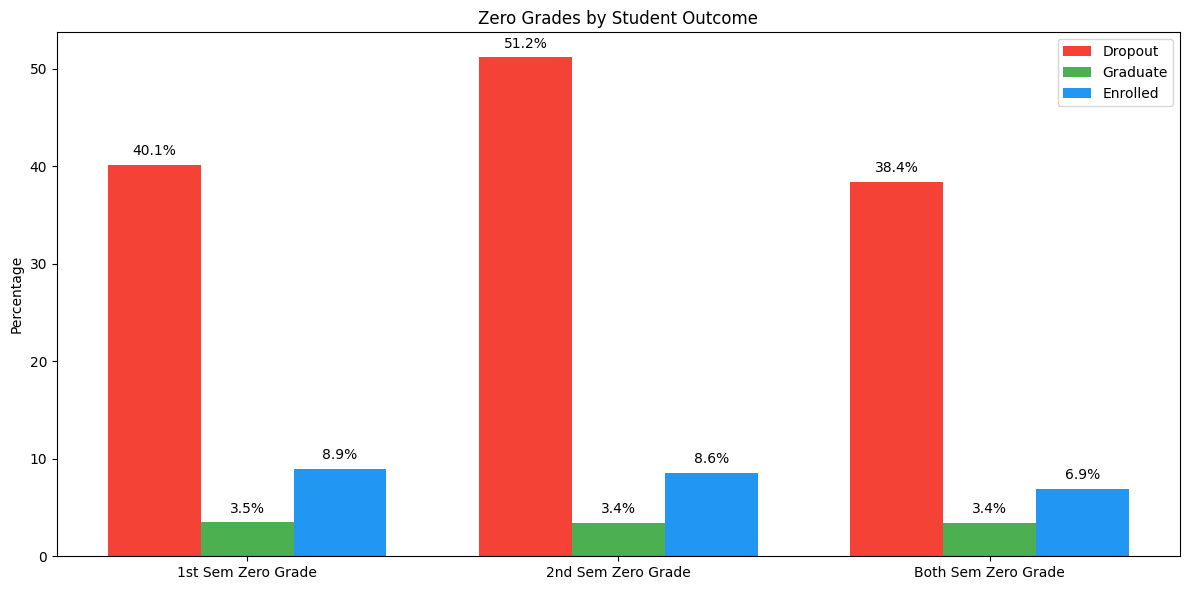

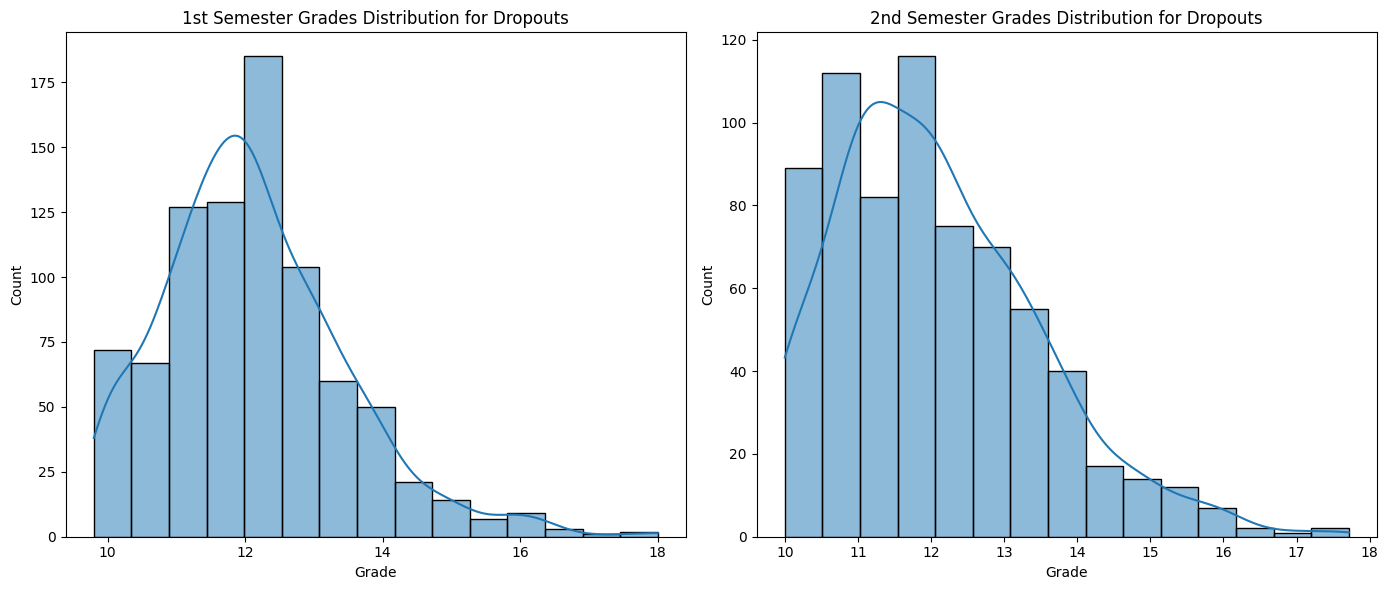

In [9]:
# Analyzing dropouts with zero grades in curricular units
# First, let's filter to only include dropout students
dropout_data = data[data['Target'] == 'Dropout']

# Check how many dropout students had zero grade in first semester
first_sem_zero_grade = dropout_data[dropout_data['Curricular units 1st sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 1st semester: {len(first_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(first_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in second semester
second_sem_zero_grade = dropout_data[dropout_data['Curricular units 2nd sem (grade)'] == 0.0]
print(f"Dropouts with zero grade in 2nd semester: {len(second_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(second_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Check how many dropout students had zero grade in BOTH semesters
both_sem_zero_grade = dropout_data[(dropout_data['Curricular units 1st sem (grade)'] == 0.0) & 
                                  (dropout_data['Curricular units 2nd sem (grade)'] == 0.0)]
print(f"Dropouts with zero grade in BOTH semesters: {len(both_sem_zero_grade)} out of {len(dropout_data)} dropouts")
print(f"Percentage: {len(both_sem_zero_grade)/len(dropout_data)*100:.2f}%")

# Visualize these findings
categories = ['1st Sem Zero Grade', '2nd Sem Zero Grade', 'Both Sem Zero Grade']
values = [len(first_sem_zero_grade), len(second_sem_zero_grade), len(both_sem_zero_grade)]
percentages = [v/len(dropout_data)*100 for v in values]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color='tomato')
plt.ylabel('Percentage of Dropout Students')
plt.title('Percentage of Dropout Students with Zero Grades')

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom')

plt.ylim(0, max(percentages) * 1.1)  # Add some space above bars for labels
plt.tight_layout()
plt.show()

# Let's also compare with non-dropout students for context
# Create a function to calculate zero grade rates by target group
def zero_grade_rates(target_group):
    target_data = data[data['Target'] == target_group]
    first_zero_grade = len(target_data[target_data['Curricular units 1st sem (grade)'] == 0.0])/len(target_data)*100
    second_zero_grade = len(target_data[target_data['Curricular units 2nd sem (grade)'] == 0.0])/len(target_data)*100
    both_zero_grade = len(target_data[(target_data['Curricular units 1st sem (grade)'] == 0.0) & 
                                     (target_data['Curricular units 2nd sem (grade)'] == 0.0)])/len(target_data)*100
    return first_zero_grade, second_zero_grade, both_zero_grade

# Calculate rates for each target group
dropout_rates = zero_grade_rates('Dropout')
graduate_rates = zero_grade_rates('Graduate')
enrolled_rates = zero_grade_rates('Enrolled')

# Create a comparison plot
labels = ['1st Sem Zero Grade', '2nd Sem Zero Grade', 'Both Sem Zero Grade']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, dropout_rates, width, label='Dropout', color='#F44336')
plt.bar(x, graduate_rates, width, label='Graduate', color='#4CAF50')
plt.bar(x + width, enrolled_rates, width, label='Enrolled', color='#2196F3')

plt.ylabel('Percentage')
plt.title('Zero Grades by Student Outcome')
plt.xticks(x, labels)
plt.legend()

# Add percentage labels
for i, v in enumerate(dropout_rates):
    plt.text(i - width, v + 1, f'{v:.1f}%', ha='center')
for i, v in enumerate(graduate_rates):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
for i, v in enumerate(enrolled_rates):
    plt.text(i + width, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Let's also look at grade distribution for dropout students
plt.figure(figsize=(14, 6))

# First semester grade distribution
plt.subplot(1, 2, 1)
dropout_grades_1st = dropout_data['Curricular units 1st sem (grade)']
dropout_grades_1st = dropout_grades_1st[dropout_grades_1st > 0]  # Filter out zeros for better visualization
sns.histplot(dropout_grades_1st, kde=True, bins=15)
plt.title('1st Semester Grades Distribution for Dropouts')
plt.xlabel('Grade')

# Second semester grade distribution
plt.subplot(1, 2, 2)
dropout_grades_2nd = dropout_data['Curricular units 2nd sem (grade)']
dropout_grades_2nd = dropout_grades_2nd[dropout_grades_2nd > 0]  # Filter out zeros for better visualization
sns.histplot(dropout_grades_2nd, kde=True, bins=15)
plt.title('2nd Semester Grades Distribution for Dropouts')
plt.xlabel('Grade')

plt.tight_layout()
plt.show()

GPA Statistics:
count    3748.000000
mean       12.691439
std         1.265827
min         9.800000
25%        11.777778
50%        12.600000
75%        13.512890
max        18.086538
Name: GPA, dtype: float64

Completion Rate Statistics:
count    4244.000000
mean        0.707877
std         0.340836
min         0.000000
25%         0.571429
50%         0.857143
75%         1.000000
max         1.000000
Name: completion_rate, dtype: float64


C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_1304\1559198563.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='GPA', data=data,
C:\Users\Kateryna.Tekmenzhi\AppData\Local\Temp\ipykernel_1304\1559198563.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='completion_rate', data=data,


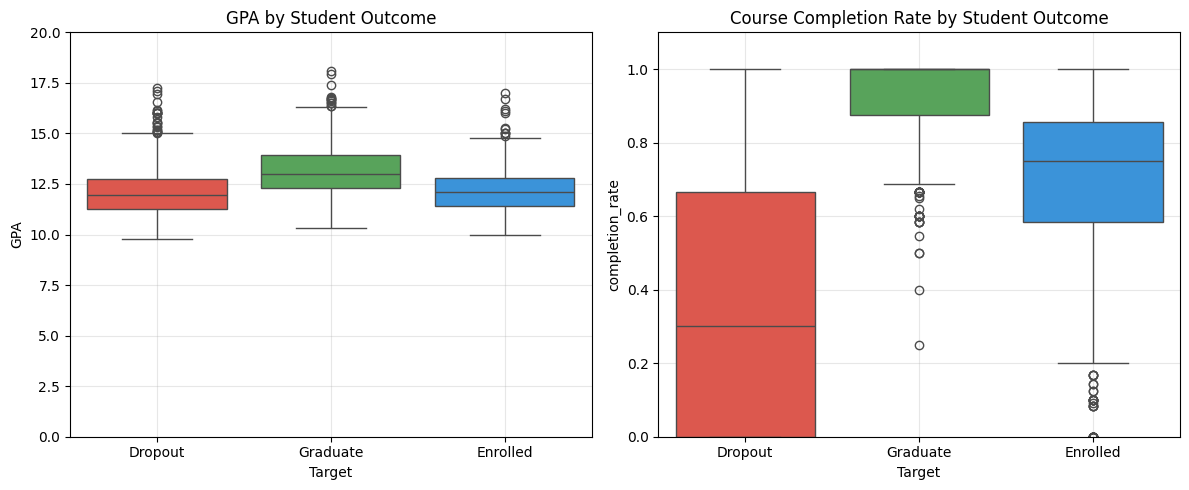

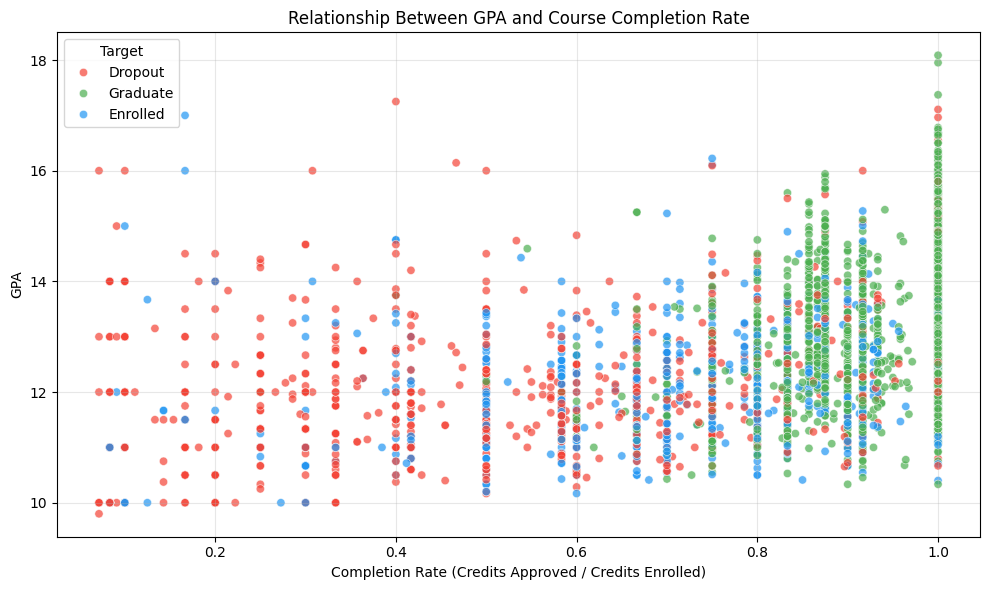


Academic Performance Categories by Student Outcome:
Target                     Dropout  Enrolled  Graduate
academic_performance                                  
High GPA, High Completion      194       297      1763
High GPA, Low Completion       237       104        18
Low GPA, High Completion       106       174       329
Low GPA, Low Completion        338       164        24
Missing data                   546        55        75

Percentage within each Student Outcome:
Target                     Dropout  Enrolled  Graduate
academic_performance                                  
High GPA, High Completion     13.7      37.4      79.8
High GPA, Low Completion      16.7      13.1       0.8
Low GPA, High Completion       7.5      21.9      14.9
Low GPA, Low Completion       23.8      20.7       1.1
Missing data                  38.4       6.9       3.4


<Figure size 1200x600 with 0 Axes>

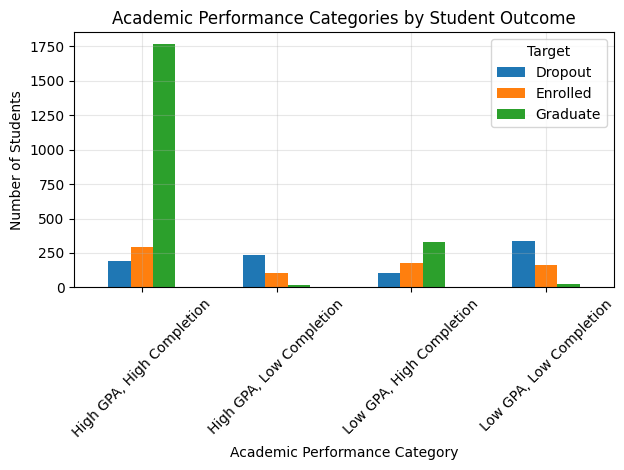

In [10]:
# Calculate a more accurate GPA using credits and grades from both semesters

# First, let's create helper columns for our calculation
# Credits attempted = Curricular units (enrolled)
# Credits completed = Curricular units (approved)
# Grade = Curricular units (grade)

# Create GPA column
data['GPA'] = np.nan  # Initialize with NaN

# Calculate weighted GPA for students who have credits in either semester
# Formula: Sum(Grade × Credits) / Sum(Credits)

# Filter for students with approved credits in at least one semester
has_credits = (data['Curricular units 1st sem (approved)'] > 0) | (data['Curricular units 2nd sem (approved)'] > 0)
data_with_credits = data[has_credits].copy()

# Calculate weighted sum of grades
data_with_credits['weighted_grade_sum'] = (
    data_with_credits['Curricular units 1st sem (grade)'] * data_with_credits['Curricular units 1st sem (approved)'] +
    data_with_credits['Curricular units 2nd sem (grade)'] * data_with_credits['Curricular units 2nd sem (approved)']
)

# Calculate total credits earned
data_with_credits['total_credits_earned'] = (
    data_with_credits['Curricular units 1st sem (approved)'] + 
    data_with_credits['Curricular units 2nd sem (approved)']
)

# Calculate GPA
data_with_credits['GPA'] = data_with_credits['weighted_grade_sum'] / data_with_credits['total_credits_earned']

# Update the original dataframe
data.loc[has_credits, 'GPA'] = data_with_credits['GPA']

# Let's also calculate the course completion rate (credits approved / credits enrolled)
data['completion_rate'] = np.nan

# Filter for students who enrolled in at least one course
enrolled_in_courses = (data['Curricular units 1st sem (enrolled)'] > 0) | (data['Curricular units 2nd sem (enrolled)'] > 0)
data_enrolled = data[enrolled_in_courses].copy()

# Calculate total credits enrolled and approved
data_enrolled['total_credits_enrolled'] = (
    data_enrolled['Curricular units 1st sem (enrolled)'] +
    data_enrolled['Curricular units 2nd sem (enrolled)']
)

data_enrolled['total_credits_approved'] = (
    data_enrolled['Curricular units 1st sem (approved)'] +
    data_enrolled['Curricular units 2nd sem (approved)']
)

# Calculate completion rate
data_enrolled['completion_rate'] = data_enrolled['total_credits_approved'] / data_enrolled['total_credits_enrolled']

# Update the original dataframe
data.loc[enrolled_in_courses, 'completion_rate'] = data_enrolled['completion_rate']

# Display summary statistics for our new metrics
print("GPA Statistics:")
print(data['GPA'].describe())

print("\nCompletion Rate Statistics:")
print(data['completion_rate'].describe())

# Visualize GPA by student outcome
plt.figure(figsize=(12, 5))

# GPA Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Target', y='GPA', data=data, 
            palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'})
plt.title('GPA by Student Outcome')
plt.ylim(0, 20)  # Based on the Portuguese grading system (0-20)
plt.grid(alpha=0.3)

# Completion Rate Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Target', y='completion_rate', data=data,
            palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'})
plt.title('Course Completion Rate by Student Outcome')
plt.ylim(0, 1.1)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Create a scatter plot showing relationship between GPA and completion rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='completion_rate', y='GPA', hue='Target', data=data,
                palette={'Graduate': '#4CAF50', 'Dropout': '#F44336', 'Enrolled': '#2196F3'},
                alpha=0.7)
plt.title('Relationship Between GPA and Course Completion Rate')
plt.xlabel('Completion Rate (Credits Approved / Credits Enrolled)')
plt.ylabel('GPA')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate thresholds for "good" academic performance
# (These can be adjusted based on your understanding of the grading system)
gpa_threshold = 12  # Assuming passing grade is 10 in a 0-20 scale
completion_threshold = 0.7  # 70% course completion

# Create categories based on thresholds
data['academic_performance'] = 'Missing data'
data.loc[~data['GPA'].isna() & ~data['completion_rate'].isna(), 'academic_performance'] = 'Low GPA, Low Completion'
data.loc[(data['GPA'] >= gpa_threshold) & (data['completion_rate'] < completion_threshold), 'academic_performance'] = 'High GPA, Low Completion'
data.loc[(data['GPA'] < gpa_threshold) & (data['completion_rate'] >= completion_threshold), 'academic_performance'] = 'Low GPA, High Completion'
data.loc[(data['GPA'] >= gpa_threshold) & (data['completion_rate'] >= completion_threshold), 'academic_performance'] = 'High GPA, High Completion'

# Count students in each category by outcome
performance_by_outcome = pd.crosstab(data['academic_performance'], data['Target'])
print("\nAcademic Performance Categories by Student Outcome:")
print(performance_by_outcome)

# Calculate percentages within each target group
performance_pct = pd.crosstab(data['academic_performance'], data['Target'], normalize='columns') * 100
print("\nPercentage within each Student Outcome:")
print(performance_pct.round(1))

# Visualize the academic performance categories
plt.figure(figsize=(12, 6))
performance_by_outcome.drop('Missing data', errors='ignore').plot(kind='bar')
plt.title('Academic Performance Categories by Student Outcome')
plt.ylabel('Number of Students')
plt.xlabel('Academic Performance Category')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [2]:
# Create a function to make the data accessible to other files
# Essentially the ability to jump into another file (like dimensions) and keep working with the data
def get_student_data():
    return data